# Setting Up VizDoom Game

In [8]:
print("Making an AI Model to play Doom using Reinforcement Learning")

Making an AI Model to play Doom using Reinforcement Learning


In [9]:
# Installing Vizdoom:
# %pip install vizdoom #For VSCode
# # OR
# !pip install vizdoom #For Notebooks

In [10]:
# %cd github & git clone https://github.com/Farama-Foundation/ViZDoom.git #For VSCode
# # OR
# !cd github & git clone https://github.com/Farama-Foundation/ViZDoom.git #For Notebooks

In [1]:
from vizdoom import *
import random
import time
import numpy as np

In [2]:
game = DoomGame() # Creating game instance
game.load_config('github/ViZDoom/scenarios/defend_the_center.cfg') # Loading the configs like Buttons, MoveSet(Going left or right etc), Bots config etc.
game.init() # Initializing the Game/Staring the game

In [13]:
# Trying to take actions in the game, based on Identity Matrix.
# Note: Regarding how the actions work, in the basic.cfg file at line 28 we can see:

    # available_buttons = {
    #     MOVE_LEFT
    #     MOVE_RIGHT
    #     ATTACK
    # }

# Now to take actions we pass them as an array to the model or to python in general. For example:
# 1. To take MOVE_LEFT action we pass the array [1,0,0] to python.
# 2. To take MOVE_RIGHT action we pass the array [0,1,0] to python.
# 3. To take ATTACK action we pass the array [0,0,1] to python.

actions = np.identity(3, dtype=np.uint8)
# Here actions matrix is:
       # [[1, 0, 0],
       # [0, 1, 0],
       # [0, 0, 1]]
# Therefore:
    # Here actions[0] = [1, 0, 0] i.e. MOVE_LEFT
    # Here actions[1] = [0, 1, 0] i.e. MOVE_RIGHT
    # Here actions[2] = [0, 0, 1] i.e. ATTACK

# We randomly select any action to pass into the game for now
print(actions)
random.choice(actions)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


array([1, 0, 0], dtype=uint8)

In [ ]:
# Looping through Episodes basically number of times we are going to play the game
# episodes = 10
episodes = 5
for episode in range(episodes):

    game.new_episode() # Starting/Restarting the game
    while not game.is_episode_finished(): # Checking if game is not finished

        # Taking some information about the game:
        state = game.get_state() # Getting the game state
        img = state.screen_buffer # Getting the actual image in form of 2D or nD arrays to run calculations on
        info = state.game_variables # Getting the game variables like Health, Ammo etc. In this case it's AMMO Only
        reward = game.make_action(random.choice(actions)) # Taking any random action. (Reward is what we are going to get when we take any action and this is what we are going to get back)
        time.sleep(0.02) 
    print("Result " + str(episode) + ": ", game.get_total_reward()) # Overall Full game reward and points
    time.sleep(2)
time.sleep(1)
game.close()

Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Rewards:  0.0
Reward

# Wrapping the game inside a Gym Environment

In [17]:
# %pip install gym #For VSCode
# # or
# !pip install gym #For Notebooks

### OpenAI Gym — Simplified

OpenAI Gym is a toolkit that gives you environments where your AI can learn by interacting. It’s like a testing ground where your agent (the AI) sees a state, takes an action, and gets a reward.

#### Gym Spaces
Discrete: Used when an AI chooses from a small set of fixed actions (e.g., jump, shoot, move left). Ideal for classification-style decisions or simple games. The agent picks one integer to act.

Box: Used when an AI needs to handle continuous inputs (e.g., image pixels, sensor values) or produce continuous actions (e.g., steering angle, throttle). The agent handles real numbers across a defined range.


In [22]:
# from gym.spaces import Discrete, Box
# import cv2 # Will be used to grayscale obzervation for faster processing of VizDoom Environment

import gymnasium as gym
from gymnasium import Env, spaces
from gymnasium.spaces import Discrete, Box
import cv2
from vizdoom import DoomGame


##### Overview of BOX and DISCRETE

In [27]:
# For now Think of Discrete as an index for the action between 0 and 2
actions[Discrete(3).sample()] # This Discrete is randomly sampleling the input from our action space -OR- action matrix.

array([0, 0, 1], dtype=uint8)

In [28]:
# These are 10 such random values from our action space using Discrete Space
for i in range(10):
    print(actions[Discrete(3).sample()])

[0 0 1]
[0 1 0]
[0 0 1]
[0 1 0]
[0 1 0]
[0 1 0]
[0 1 0]
[1 0 0]
[0 0 1]
[0 0 1]


In [29]:
# Box takes input a low value and a high value and it can return an array of m*n dimensions
Box(low=0, high=10, shape=(10,10), dtype=np.uint8).sample()

array([[ 2,  3,  7,  3,  7,  8,  6, 10,  2,  0],
       [ 9, 10,  2,  4,  5,  9,  2,  8,  6,  9],
       [ 4,  3,  9,  3,  1,  4,  0, 10,  4, 10],
       [ 2, 10,  1,  4,  4,  5,  9,  3,  1,  9],
       [ 9,  2,  5, 10,  9,  8,  5,  6, 10,  1],
       [ 3,  7,  9,  9,  6,  2,  1,  8,  1,  4],
       [ 2,  5,  3,  9,  7,  3,  7,  7,  1,  1],
       [ 3, 10,  4,  5,  8,  6, 10,  5,  0,  6],
       [ 8,  8,  4, 10,  6,  6,  1,  7,  5,  6],
       [10,  2,  4,  4,  9,  5,  4, 10,  7,  8]], dtype=uint8)

#### Creating VizDoom OpenAI Gym Environment

In [30]:
class VizDoomGym(gym.Env):

    # Default Function called during start of Env. In short (setting new episode, setting different spaces etc)
    def __init__(self, render=False):
        # Inherting from Env
        super().__init__()

        #Setting up the game
        self.game = DoomGame() # Creating game instance
        self.game.load_config('github/ViZDoom/scenarios/defend_the_center.cfg') # Loading the configs like Buttons, MoveSet(Going left or right etc), Bots config etc.

        # Render Frame Logic: This is done to train the model faster, because each time if the game is visible it will take more computation and hamper the model training.
        # This will start the game in the background as a background process.
        if render == False:
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)

        self.game.init() # Initializing the Game/Staring the game

        # self.observation_space = Box(low=0, high=255, shape=(100, 160, 1), dtype=np.uint8)
        # self.action_space = Discrete(3)
        self.observation_space = spaces.Box(low=0, high=255, shape=(100, 160, 1), dtype=np.uint8)
        self.action_space = spaces.Discrete(3)

        self.prev_ammo = None  # Initialize ammo tracker to None

    # Taking a particular action in environment
    def step(self, action):
        # Defining the actions MATRIX explained above
        actions = np.identity(3, dtype=np.uint8)
        # Taking a specific action="action" passed to the step function. The 4 is the frame skip property.
        reward = self.game.make_action(actions[action], 4)

        if self.game.get_state():
        # Taking some information about the game:
            state = self.game.get_state().screen_buffer # Getting the actual image in form of 2D or nD arrays to run calculations on
            state = self.grayscale(state)
            # info = self.game.get_state().game_variables # Getting the game variables like Health, Ammo etc. In this case it's AMMO Only
            ammo = self.game.get_state().game_variables[0]
            info = {"ammo": ammo}
        else:
            state = np.zeros(self.observation_space.shape)
            ammo = None  # >>> Make sure ammo is None if no game state
            info = {"ammo": None}

        # Reward shaping: Penalize ammo usage to avoid random shooting >>> Added below
        if self.prev_ammo is not None and ammo is not None:
            ammo_used = self.prev_ammo - ammo
            if ammo_used > 0:
                # Penalize wasted shots (0.1 per ammo used)
                reward -= 0.1 * ammo_used
            else:
                # Bonus small reward for conserving ammo
                reward += 0.05
        self.prev_ammo = ammo  # Update ammo tracker for next step

        terminated = self.game.is_episode_finished() # Returning True or False whether the game is currently running or not (No matter in Background or Not)
        truncated = False

        return state, reward, terminated, truncated, info

    # Define how to render the game or environment (No Need)
    def render(self, mode='human'):
        pass

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        # Initialize ammo tracking at reset >>> Added below
        self.prev_ammo = self.game.get_state().game_variables[0]
        return self.grayscale(state), {}

    # To grayscale the game frame and resize it
    def grayscale(self, game_frame):
        # We moved the axis which means that we changed the shape or REORDERED the matrix.
        # This is done because this is the shape in which the cvtColor expects the image
        # This is not going to LITERALLY GRAYSCALE the image, but this is instead going to remove the color channel from the "screen_buffer()"
        # The GRAYSCALED image is just a frame shown using the matplotlib library
        gray = cv2.cvtColor(np.moveaxis(game_frame, 0, -1), cv2.COLOR_RGB2GRAY) 


        # This Resizing and Reshaping is done to cut down the pixel.
        # After Reshaping and Resizing we need to process less number of pixels.
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100, 160, 1))
    
        return state
    
    def seed(self, seed=None):
        # You can set seeds for any random processes your env uses here.
        # For example, if DoomGame has a seed method, use it, else just set numpy and random seeds.
        import random
        import numpy as np

        self._seed = seed
        random.seed(seed)
        np.random.seed(seed)
        return [seed]

    # Called to close the game
    def close(self):
        self.game.close()


In [31]:
env = VizDoomGym(render=True)

In [33]:
# Environemnt Checker to check for any bugs or glitches in the Code or Environment
from stable_baselines3.common import env_checker
env_checker.check_env(env)

In [ ]:
state, info = env.reset()
state.shape # Only 2 channels are visible here and the 3rd is '1', which means the image have a grayscaled channel.

(100, 160, 1)

In [ ]:
# %pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


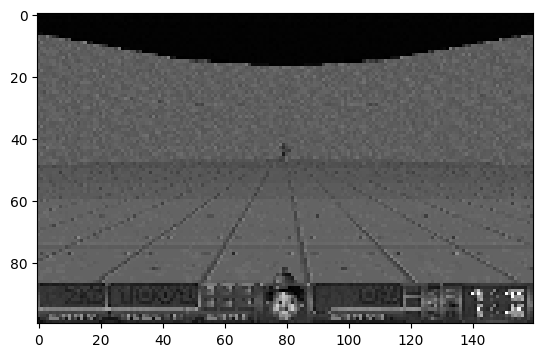

In [36]:
from matplotlib import pyplot as plt 
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))

# Training the REINFORCEMENT LEARNING Model
---
### I am Going to use PPO-RL Algorithm which is Trained on Actor Critic Algorithm to train my model.
#### -> Their are 2 neural networks in Actor Critic Algorithm:
#### -> Actor: Controls the Agent Actions
#### -> Critic: Tries to Predict the Future Returns from the current state
---
Basically their are 4 elements:
1. Agent: Our Player
2. Action: Player Moving Left, Right, Shooting
3. Reward: Depending on Actions, get reward
4. Environment: The overall environment, enemy location, Agent location etc.

AI Controlling the Agent learns what actions to take in Environment in order to maximize the reward.

---
---

### Working of my Algorithm:

**Step 1:** We get the observation (current frame) from our game.

**Step 2:** That frame is passed to both Actor and Critic:
- **Actor** outputs a set of probabilities for what actions to take.
- **Critic** outputs expected future returns from the current state.

**Step 3:** Using the Actor output, we select an action and perform it.
- The **observation**, **reward**, **action**, **value**, and **probabilities** are all stored in a temporary buffer.

**Step 4:** This continues until the game is done or the maximum game length is reached.

**Step 5:** After collecting all the data, we use it to train the model.


In [20]:
# Installing Pytorch:

# For Notebooks
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# OR

# For VS Code
# %pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [21]:
# Installing Stable-Baselines for PPO Algorithm:

# For Notebooks
# !pip install stable-baselines3[extra]

# OR

# For VS Code
# %pip install stable-baselines3[extra]

In [37]:
# Checking for Installations
import torch
import stable_baselines3
from stable_baselines3 import PPO
print("Pytorch: ", torch.__version__)
print("Stable Baseline: ", stable_baselines3.__version__)


Pytorch:  2.6.0+cu118
Stable Baseline:  2.6.0


In [38]:
import os # For navigating folders
# Lets you insert custom code during training in Stable-Baselines3. It's used for tasks like saving best models, early stopping, or logging custom metrics.
from stable_baselines3.common.callbacks import BaseCallback

##### Class to Automatically Save the RL Model Every Few Steps During Training

In [39]:
# BaseCallback: Saves the model regularly during training so model don’t lose progress if something crashes.
class TrainAndLoggingCallback(BaseCallback):  # Custom callback extending BaseCallback for periodic model saving
    def __init__(self, check_freq, save_path, verbose = 1):  # Initialize callback with save frequency and path
        super(TrainAndLoggingCallback, self).__init__(verbose)  # Call parent constructor with verbosity setting
        self.check_freq = check_freq  # Set how often to save the model
        self.save_path = save_path  # Set the directory to save models
        
    def _init_callback(self):  # Called at the beginning of training
        if self.save_path is not None:  # Ensure save_path is defined
            os.makedirs(self.save_path, exist_ok=True)  # Create save directory if it doesn't exist
    
    def _on_step(self):  # Called at every step during training
        if self.n_calls % self.check_freq == 0:  # Check if current step is a checkpoint
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls)) # Constructs the full file path to save the model, inside the specified save_path directory. This enables saving multiple model versions at regular intervals during training for later evaluation.
            self.model.save(model_path)  # Save current model to the constructed path
        return True  # Continue training


In [40]:
CHECKPOINT_DIR = './train/train_defend_center' # Directory for saving our trained RL Model
LOG_DIR = './logs/log_defend_center'

In [41]:
# Instance of our Training and Logging Callback
# This means after every 10,000 steps of training the model, we are going to save the version of those PyTorch Weights of our RL Agent.
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

### Actually Training the Algorithm

In [43]:
# importing PPO for training
from stable_baselines3 import PPO

In [45]:
import torch
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.monitor import Monitor

def make_env(seed=0):
    def _init():
        env = VizDoomGym(render=False)
        env.seed(seed)
        env = Monitor(env)
        return env
    return _init

# Set seeds for reproducibility
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

env = DummyVecEnv([make_env(seed=SEED)])  # Single env wrapped in DummyVecEnv with Monitor

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using device:", device)

model = PPO(
    'CnnPolicy',
    env,
    tensorboard_log=LOG_DIR,
    verbose=1,
    learning_rate=0.0001,
    n_steps=4096,
    batch_size=64,
    n_epochs=10,
    device=device,
    seed=SEED,
)

print("Model is on:", model.policy.device)




# 'CnnPolicy': Uses a convolutional neural network, used for processing image-based observations like game frames.
# env: The environment where the agent learns and acts; must follow the Gymnasium API.
# tensorboard_log=LOG_DIR: Specifies the path to save logs for visualizing training metrics using TensorBoard.
# verbose=1: Enables informational output during training; helps monitor progress in the console.
# learning_rate=0.0001: Controls how quickly the model updates its knowledge; lower values lead to more stable learning.
# n_steps=2048: Number of environment steps to run (frames to store) before each policy update; affects training stability and memory use.

Using device: cuda
Using cuda device
Wrapping the env in a VecTransposeImage.
Model is on: cuda:0


# Note: 
### Only Run this code cell if you want to train the model. Otherwise don't. Skip to Testing directly.

In [ ]:
# model.learn(total_timesteps=150000, callback=callback)

Logging to ./logs/log_defend_center\PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 76.3     |
|    ep_rew_mean     | 1.8      |
| time/              |          |
|    fps             | 30       |
|    iterations      | 1        |
|    time_elapsed    | 132      |
|    total_timesteps | 4096     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 82.7        |
|    ep_rew_mean          | 2.26        |
| time/                   |             |
|    fps                  | 30          |
|    iterations           | 2           |
|    time_elapsed         | 264         |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.008012695 |
|    clip_fraction        | 0.0689      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -0

# Testing the RL Model

In [53]:
# Importing Evaluate_Policy to Test the Agent
from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
# Loading the best model (from Disk), the total trained list. In my case the latest model present in directory is loaded
model = PPO.load('./defend_center_150000')
env = VizDoomGym(render=True) # Rendered Environment for Testing Purposes

In [55]:
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5) # Evaluating Mean Reward for 10 games of DOOM!

In [56]:
mean_reward

32.38999973759055

In [ ]:
import time
import numpy as np

for episode in range(5):
    obs = env.reset()[0]
    total_reward = 0
    done = False
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        time.sleep(0.20)
        total_reward += reward  # reward is a vector from DummyVecEnv
    print(f"Total Reward for episode {episode + 1}: {total_reward}")
    time.sleep(2)


Total Reward for episode 1: 23.95000000000012
Total Reward for episode 2: 31.350000000000122
Total Reward for episode 3: 33.79999999999997
Total Reward for episode 4: 34.59999999999995
Total Reward for episode 5: 33.79999999999997


In [61]:
env.close()